In [1]:
# Import necessary libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

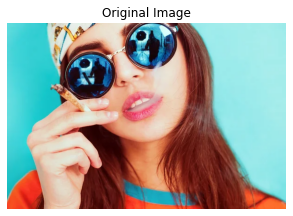

In [2]:
# Opens an image with cv2

img = cv2.imread("/Users/roja/Downloads/sample7.jpeg")
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.axis("off")
plt.title("Original Image")
plt.show()

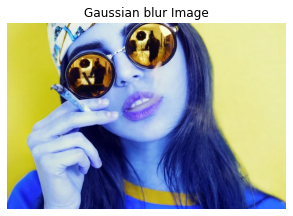

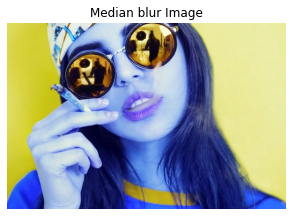

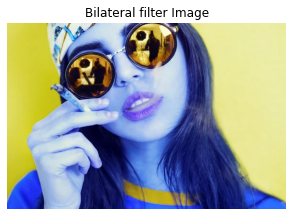

In [3]:
# Filtering

# Apply some Gaussian blur on the image
img_gb = cv2.GaussianBlur(img, (7, 7) ,0)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Gaussian blur Image")
plt.show()

# Apply some Median blur on the image
img_mb = cv2.medianBlur(img_gb, 5)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Median blur Image")
plt.show()

# Apply a bilateral filer on the image
img_bf = cv2.bilateralFilter(img_mb, 5, 80, 80)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Bilateral filter Image")
plt.show()



### Note: 
Don't see the difference between the images? Neither do I that well, you can spot the differences if you know what each filter does! The Laplacian filter will detect the differences.

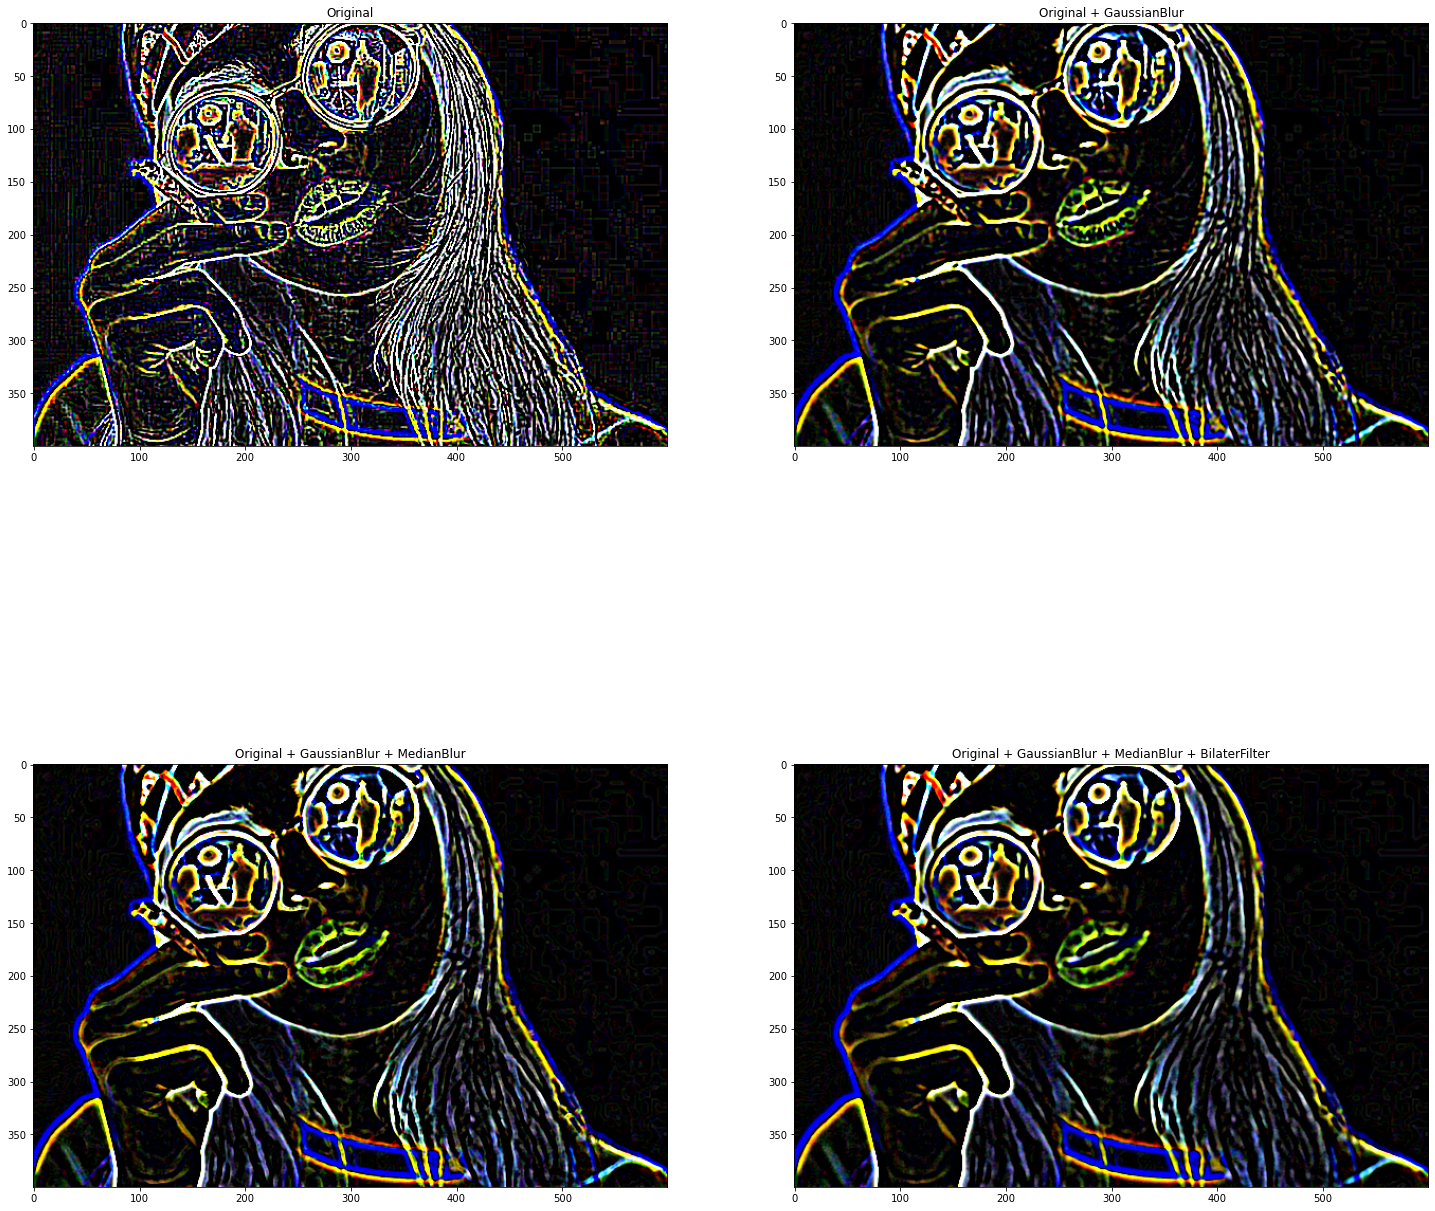

In [4]:
# Edge detection

# Use the laplace filter to detect edges
img_lp_im = cv2.Laplacian(img, cv2.CV_8U, ksize=5)


img_lp_gb = cv2.Laplacian(img_gb, cv2.CV_8U, ksize=5)


img_lp_mb = cv2.Laplacian(img_mb, cv2.CV_8U, ksize=5)


img_lp_al = cv2.Laplacian(img_bf, cv2.CV_8U, ksize=5)


# Plot the image to see some differences.
f, axarr = plt.subplots(2,2, figsize=(25, 25))
axarr[0,0].imshow(img_lp_im, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text('Original')
axarr[0,1].imshow(img_lp_gb, cmap='gray', vmin=0, vmax=255)
axarr[0,1].title.set_text('Original + GaussianBlur')
axarr[1,0].imshow(img_lp_mb, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text('Original + GaussianBlur + MedianBlur')
axarr[1,1].imshow(img_lp_al, cmap='gray', vmin=0, vmax=255)
axarr[1,1].title.set_text('Original + GaussianBlur + MedianBlur + BilaterFilter')

# Save the figure if needed
plt.savefig('LaplacianComparison.png')

#### You can now see that Laplacian of the original image detected a lot of noise. The image with all the filters is the sharpest, which comes in handy in a bit. This is however not yet what we want. We need an image preferably black and white that we can use as a mask. So lets continue to edit this image. Let us first convert it to a greyscale image.

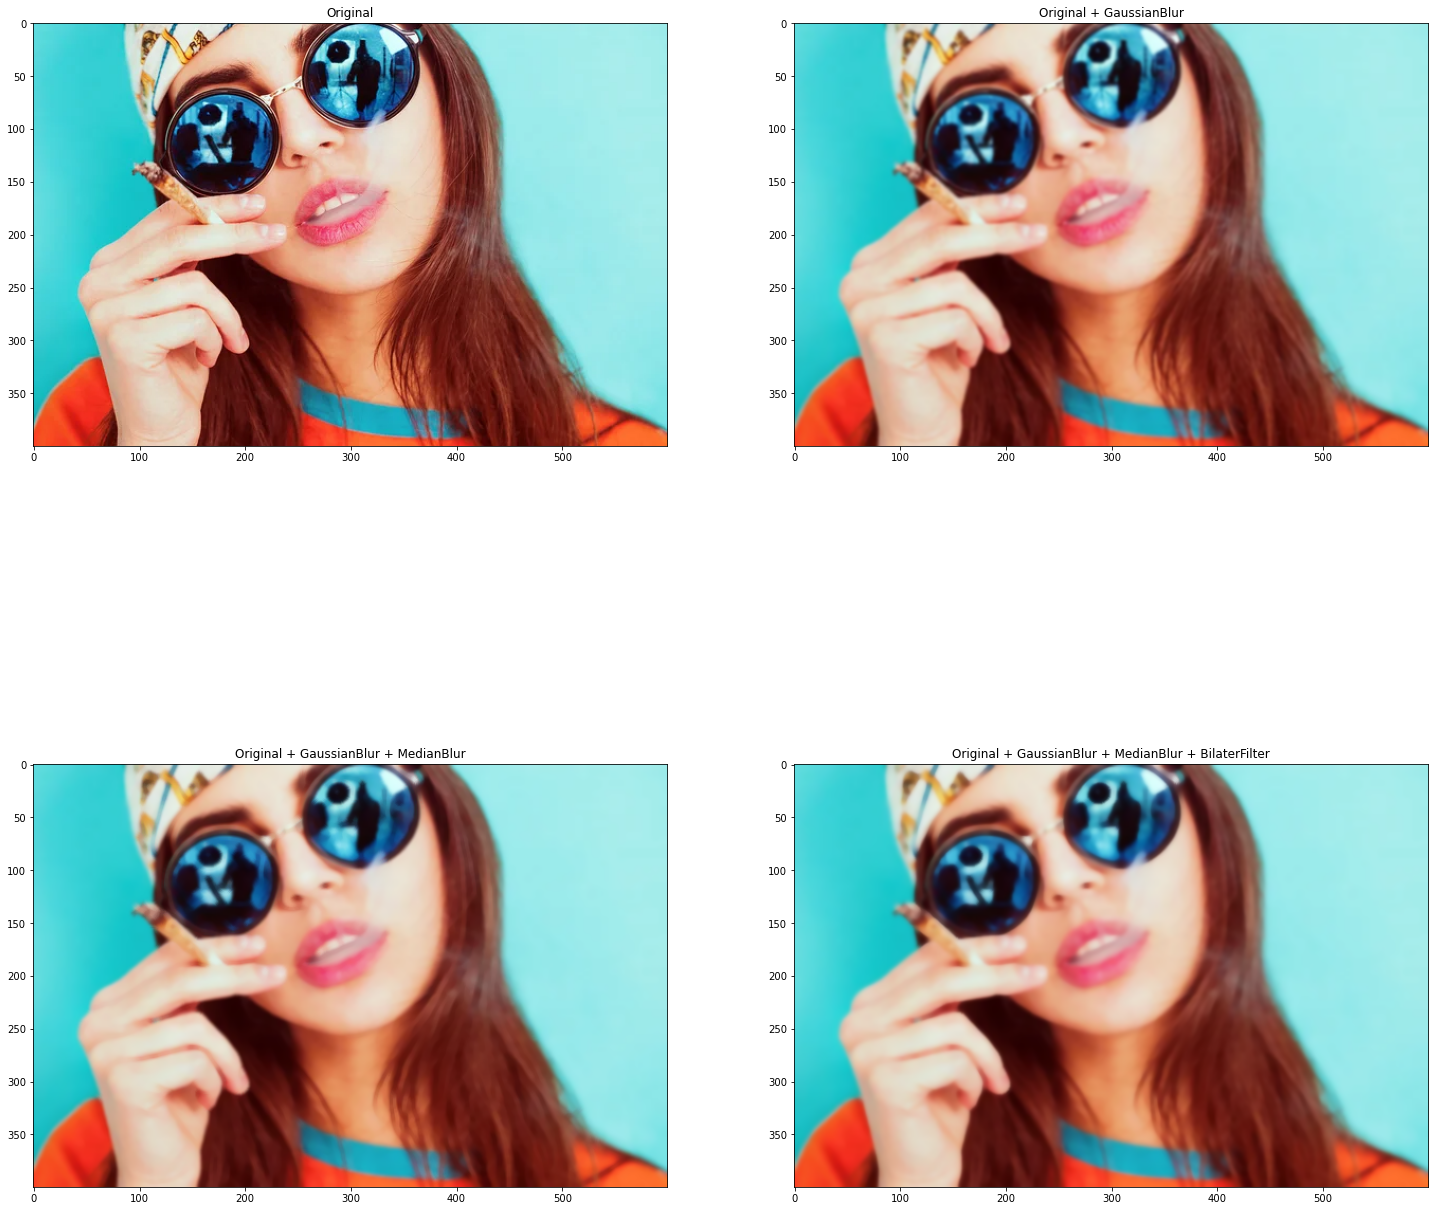

In [5]:
# Convert from BGR back to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gb_RGB = cv2.cvtColor(img_gb, cv2.COLOR_BGR2RGB)
img_mb_RGB = cv2.cvtColor(img_mb, cv2.COLOR_BGR2RGB)
img_bf_RGB = cv2.cvtColor(img_bf, cv2.COLOR_BGR2RGB)

# Plot the image to see some differences.
f, axarr = plt.subplots(2, 2, figsize=(25, 25))
axarr[0,0].imshow(img_RGB)
axarr[0,0].title.set_text('Original')
axarr[0,1].imshow(img_gb_RGB)
axarr[0,1].title.set_text('Original + GaussianBlur')
axarr[1,0].imshow(img_mb_RGB)
axarr[1,0].title.set_text('Original + GaussianBlur + MedianBlur')
axarr[1,1].imshow(img_bf_RGB)
axarr[1,1].title.set_text('Original + GaussianBlur + MedianBlur + BilaterFilter')

# Save the figure if needed
plt.savefig('FilterComparisons.png')

In [6]:
# Convert the image to greyscale (1D)
img_lp_im_grey = cv2.cvtColor(img_lp_im, cv2.COLOR_BGR2GRAY)
img_lp_gb_grey = cv2.cvtColor(img_lp_gb, cv2.COLOR_BGR2GRAY)
img_lp_mb_grey = cv2.cvtColor(img_lp_mb, cv2.COLOR_BGR2GRAY)
img_lp_al_grey = cv2.cvtColor(img_lp_al, cv2.COLOR_BGR2GRAY)

# Remove some additional noise
blur_im = cv2.GaussianBlur(img_lp_im_grey, (5, 5), 0)
blur_gb = cv2.GaussianBlur(img_lp_gb_grey, (5, 5), 0)
blur_mb = cv2.GaussianBlur(img_lp_mb_grey, (5, 5), 0)
blur_al = cv2.GaussianBlur(img_lp_al_grey, (5, 5), 0)

# Apply a threshold (Otsu)
_, tresh_im = cv2.threshold(blur_im, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_gb = cv2.threshold(blur_gb, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_mb = cv2.threshold(blur_mb, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_al = cv2.threshold(blur_al, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert the black and the white
inverted_original = cv2.subtract(255, tresh_im)
inverted_GaussianBlur = cv2.subtract(255, tresh_gb)
inverted_MedianBlur = cv2.subtract(255, tresh_mb)
inverted_Bilateral = cv2.subtract(255, tresh_al)



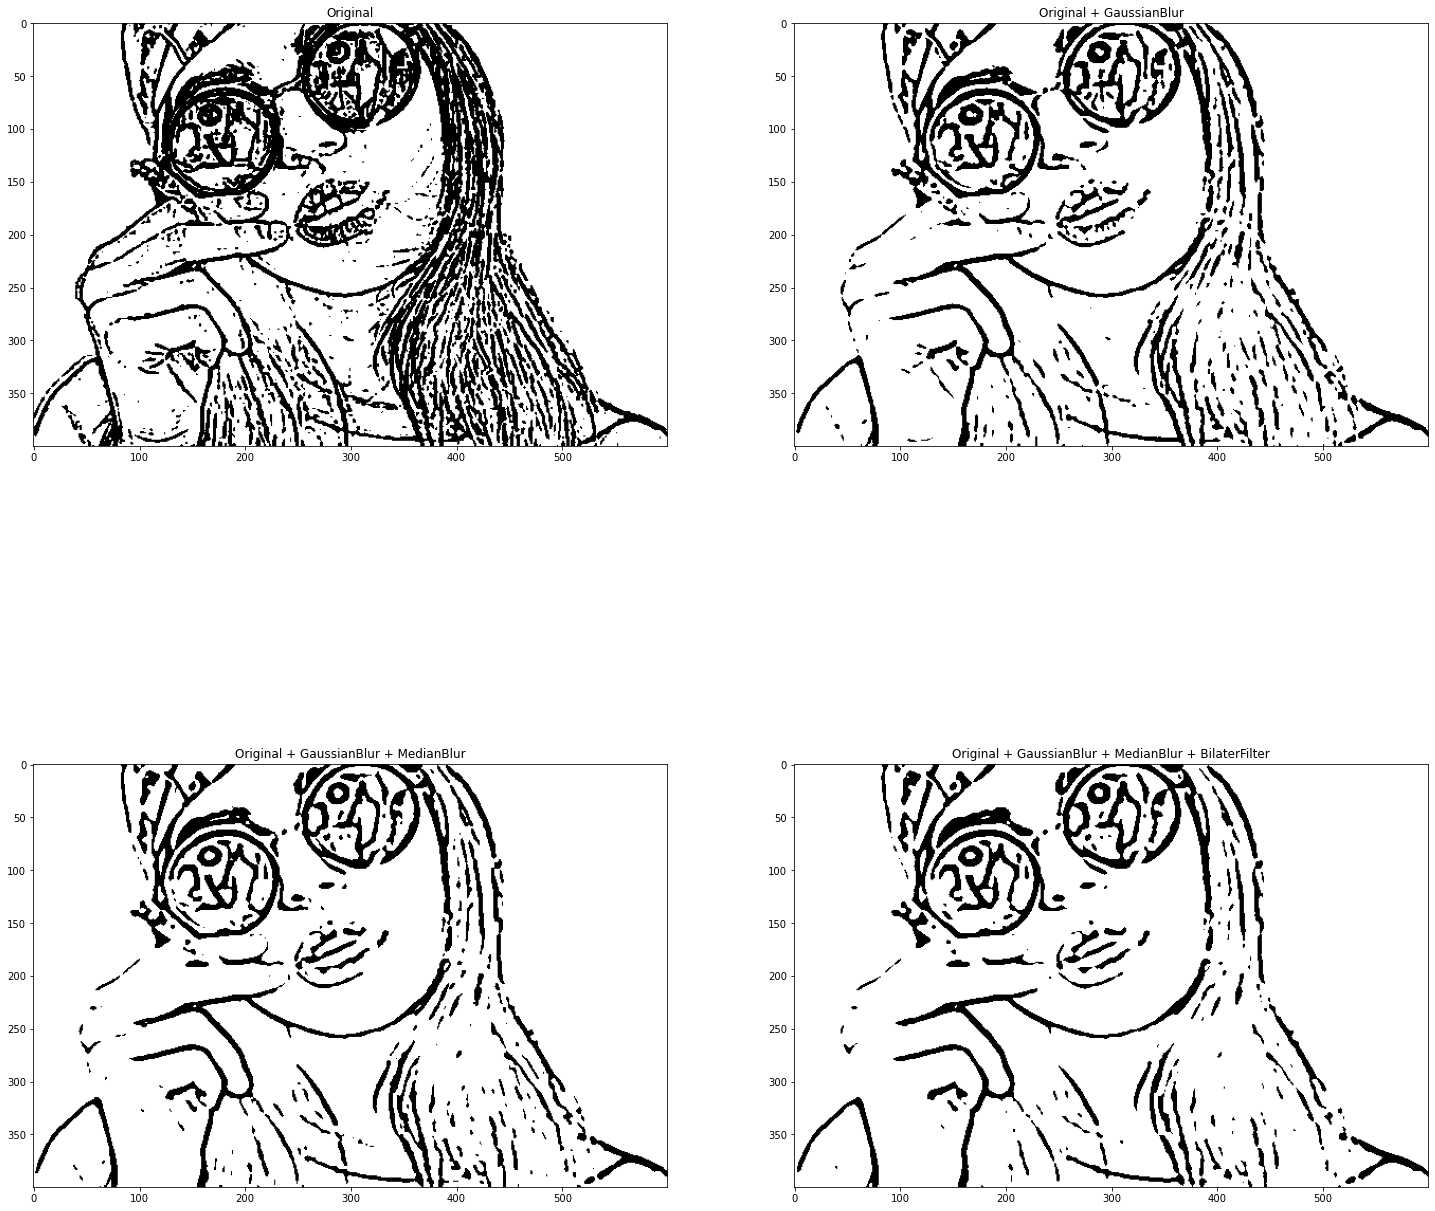

In [7]:
# Plot the image to see some differences.
f, axarr = plt.subplots(2,2, figsize=(25, 25))
axarr[0,0].imshow(inverted_original, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text('Original')
axarr[0,1].imshow(inverted_GaussianBlur, cmap='gray', vmin=0, vmax=255)
axarr[0,1].title.set_text('Original + GaussianBlur')
axarr[1,0].imshow(inverted_MedianBlur, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text('Original + GaussianBlur + MedianBlur')
axarr[1,1].imshow(inverted_Bilateral, cmap='gray', vmin=0, vmax=255)
axarr[1,1].title.set_text('Original + GaussianBlur + MedianBlur + BilaterFilter')

# Save the figure if needed
plt.savefig('treshingComparison.png')


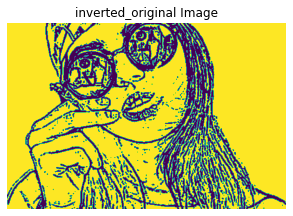

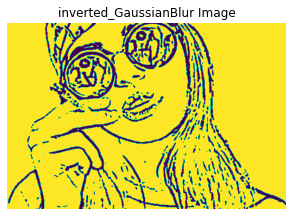

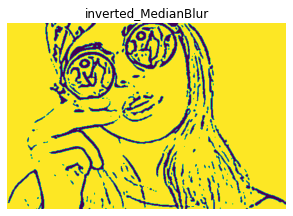

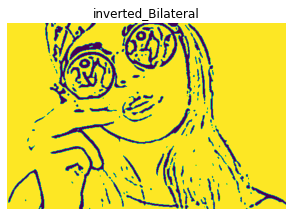

In [8]:
# Invert the black and the white

inverted_original = cv2.subtract(255, tresh_im)
plt.figure(figsize=(5, 5))
plt.imshow(inverted_original)
plt.axis("off")
plt.title("inverted_original Image")
plt.show()

inverted_GaussianBlur = cv2.subtract(255, tresh_gb)
plt.figure(figsize=(5, 5))
plt.imshow(inverted_GaussianBlur)
plt.axis("off")
plt.title("inverted_GaussianBlur Image")
plt.show()

inverted_MedianBlur = cv2.subtract(255, tresh_mb)
plt.figure(figsize=(5, 5))
plt.imshow(inverted_MedianBlur)
plt.axis("off")
plt.title("inverted_MedianBlur")
plt.show()

inverted_Bilateral = cv2.subtract(255, tresh_al)
plt.figure(figsize=(5, 5))
plt.imshow(inverted_Bilateral)
plt.axis("off")
plt.title("inverted_Bilateral")
plt.show()

In [9]:
# Reduce the colors of the original image

div = 64
img_bins = img // div * div + div // 2

In [10]:
# Color Quantization

# Reshape the image
img_reshaped = img.reshape((-1,3))
# convert to np.float32
img_reshaped = np.float32(img_reshaped)
# Set the Kmeans criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set the amount of K (colors)
K = 8
# Apply Kmeans
_, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Covert it back to np.int8
center = np.uint8(center)
res = center[label.flatten()]
# Reshape it back to an image
img_Kmeans = res.reshape((img.shape))

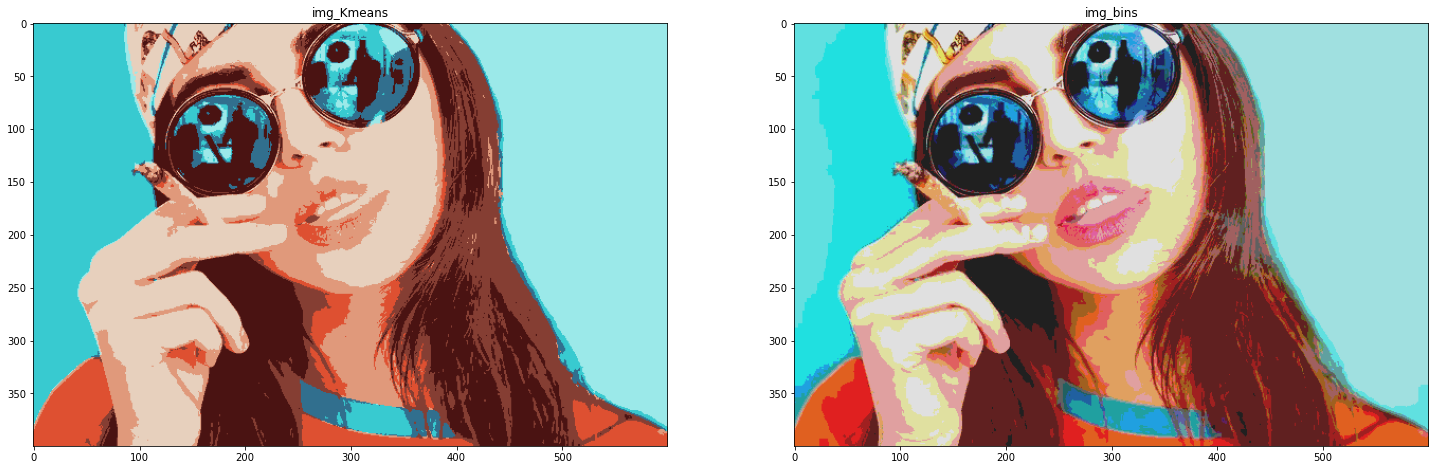

In [11]:
# Convert BGR back to RGB
img_Kmeans_RGB = cv2.cvtColor(img_Kmeans, cv2.COLOR_BGR2RGB)
img_bins_RGB = cv2.cvtColor(img_bins, cv2.COLOR_BGR2RGB)

# Plot the binned images to see  differences.
f, axarr = plt.subplots(1, 2, figsize=(25, 25))
axarr[0].imshow(img_Kmeans_RGB)
axarr[0].title.set_text('img_Kmeans')
axarr[1].imshow(img_bins_RGB)
axarr[1].title.set_text('img_bins')

plt.savefig('colorReduce.png')

In [12]:
# Convert the mask image back to color
inverted_Bilateral = cv2.cvtColor(inverted_Bilateral, cv2.COLOR_GRAY2RGB)
# Combine the edge image and the binned image
cartoon_Bilateral = cv2.bitwise_and(inverted_Bilateral, img_bins)

# Save the image
cv2.imwrite('CartoonImage.png', cartoon_Bilateral)

True